In [1]:
%load_ext autoreload

In [16]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import handytools.visualizer as vis
from spectools.stimulus.wyeth import get_stimulus
from spectools.responses import get_response_wrapper
from spectools.metrics.metrics import responsive
from spectools.models.models import AN_layer, VGG16_layer, ResNet18_layer

In [3]:
def get_prs(R_fills, R_outlines, hkeys, verbose=False):
    prs = {}
    non_resp = {}
    for hkey in hkeys:
        R_fill = R_fills[hkey]
        R_outline = R_outlines[hkey]

        prs[hkey] = []
        non_resp[hkey] = []
        
        for unit in range(R_fill.shape[0]):
            resp = responsive(R_fill[unit]) and responsive(R_outline[unit])
            if resp:
                pr = np.corrcoef(R_fill[unit], R_outline[unit])[0][1]
                prs[hkey].append(pr)
            else:
                prs[hkey].append(0)
                non_resp[hkey].append(unit)
                if verbose: print(f"Layer {hkey}, unit {unit} not responsive!")
    return prs, non_resp

# Fill-Outline Invariance (FOI) for different networks

In [4]:
# params
xn = 227
sz = 50
lw = 1.5
fg = 1.0
bg = 0.0

## For AlexNet

In [5]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

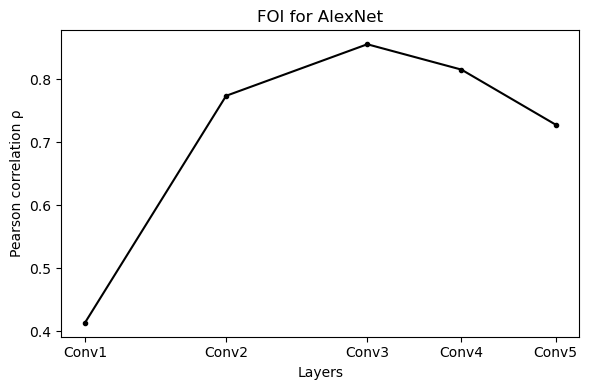

In [6]:
prs_an_foi, non_resp = get_prs(R_fills, R_outlines, hkeys)
func = lambda r, exclude: np.sum(r)/(len(r)-exclude)
res = [func(prs_an_foi[hkey], len(non_resp[hkey])) for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for AlexNet")
plt.tight_layout(); plt.show()

## For VGG16

In [7]:
# params
hkeys = list(VGG16_layer.keys())
mtype = "VGG16"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

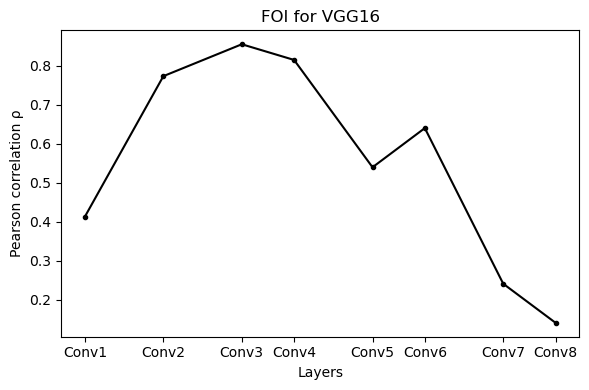

In [9]:
prs_vgg16_foi, non_resp = get_prs(R_fills, R_outlines, hkeys)
func = lambda r, exclude: np.sum(r)/(len(r)-exclude)
res = [func(prs_vgg16_foi[hkey], len(non_resp[hkey])) for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([VGG16_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for VGG16")
plt.tight_layout(); plt.show()

## For ResNet18

In [10]:
# params
hkeys = list(ResNet18_layer.keys())
mtype = "ResNet18"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

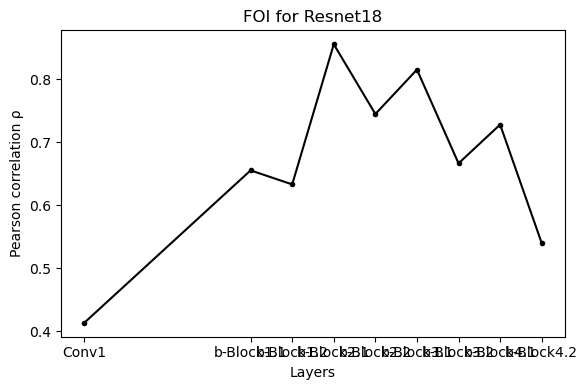

In [11]:
prs_resnet18_foi, non_resp = get_prs(R_fills, R_outlines, hkeys)
func = lambda r, exclude: np.sum(r)/(len(r)-exclude)
res = [func(prs_resnet18_foi[hkey], len(non_resp[hkey])) for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for Resnet18")
plt.tight_layout(); plt.show()

# On-Off Invariance (OOI) for different networks

In [12]:
# params
xn = 227
sz = 50
lw = 1.5
bg = 0.0
fillflag = 1

verbose = False

## For AlexNet

In [29]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

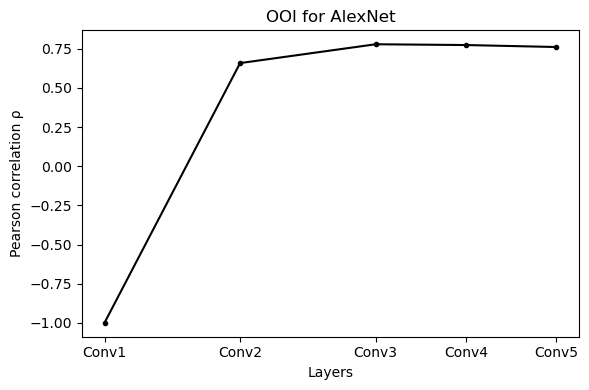

In [30]:
prs_an_ooi, non_resp = get_prs(R_ons, R_offs, hkeys)
func = lambda r, exclude: np.sum(r)/(len(r)-exclude)
res = [func(prs_an_ooi[hkey], len(non_resp[hkey])) for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for AlexNet")
plt.tight_layout(); plt.show()

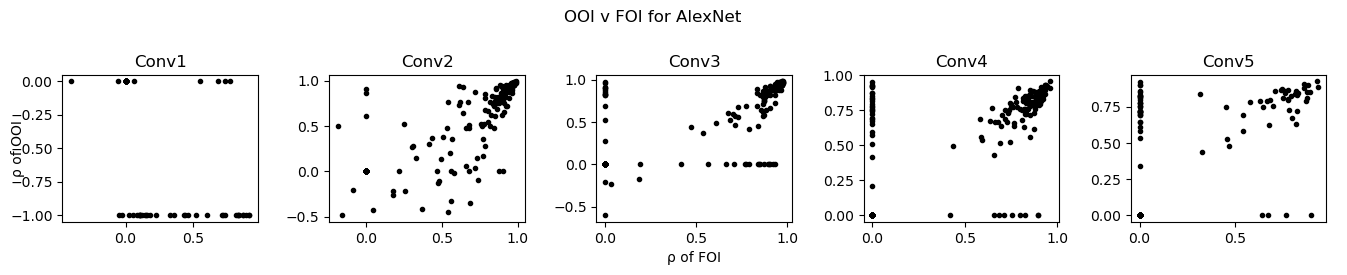

In [31]:
fig = plt.figure(figsize=(len(hkeys)*3 - 1, 3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(1, len(hkeys), i+1)
    ax.plot(prs_an_foi[hkey], prs_an_ooi[hkey], "k.")
    ax.set_title(AN_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for AlexNet")
plt.tight_layout(); plt.show()

## For VGG16

In [32]:
# params
hkeys = list(VGG16_layer.keys())
mtype = "VGG16"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

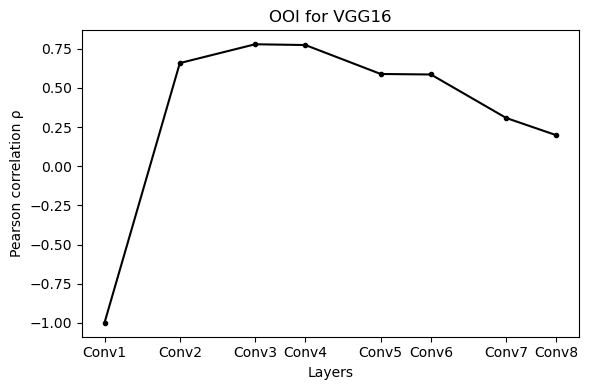

In [33]:
prs_vgg16_ooi, non_resp = get_prs(R_ons, R_offs, hkeys)
func = lambda r, exclude: np.sum(r)/(len(r)-exclude)
res = [func(prs_vgg16_ooi[hkey], len(non_resp[hkey])) for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([VGG16_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for VGG16")
plt.tight_layout(); plt.show()

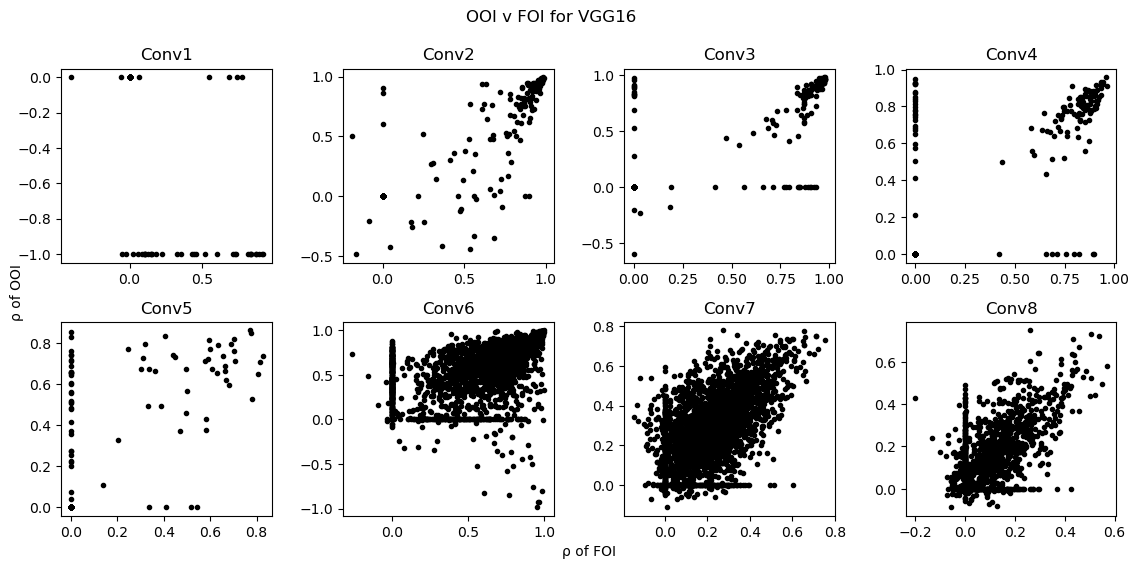

In [34]:
fig = plt.figure(figsize=(4*3, 2*3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(2, 4, i+1)
    ax.plot(prs_vgg16_foi[hkey], prs_vgg16_ooi[hkey], "k.")
    ax.set_title(VGG16_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for VGG16")
plt.tight_layout(); plt.show()

## For ResNet18

In [35]:
# params
hkeys = list(ResNet18_layer.keys())
mtype = "ResNet18"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

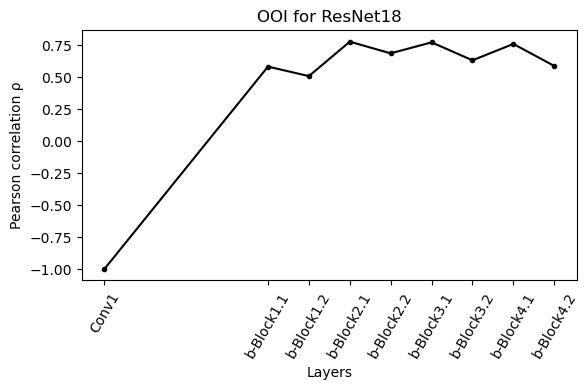

In [37]:
prs_resnet18_ooi, non_resp = get_prs(R_ons, R_offs, hkeys)
func = lambda r, exclude: np.sum(r)/(len(r)-exclude)
res = [func(prs_resnet18_ooi[hkey], len(non_resp[hkey])) for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for ResNet18")
plt.tight_layout(); plt.show()

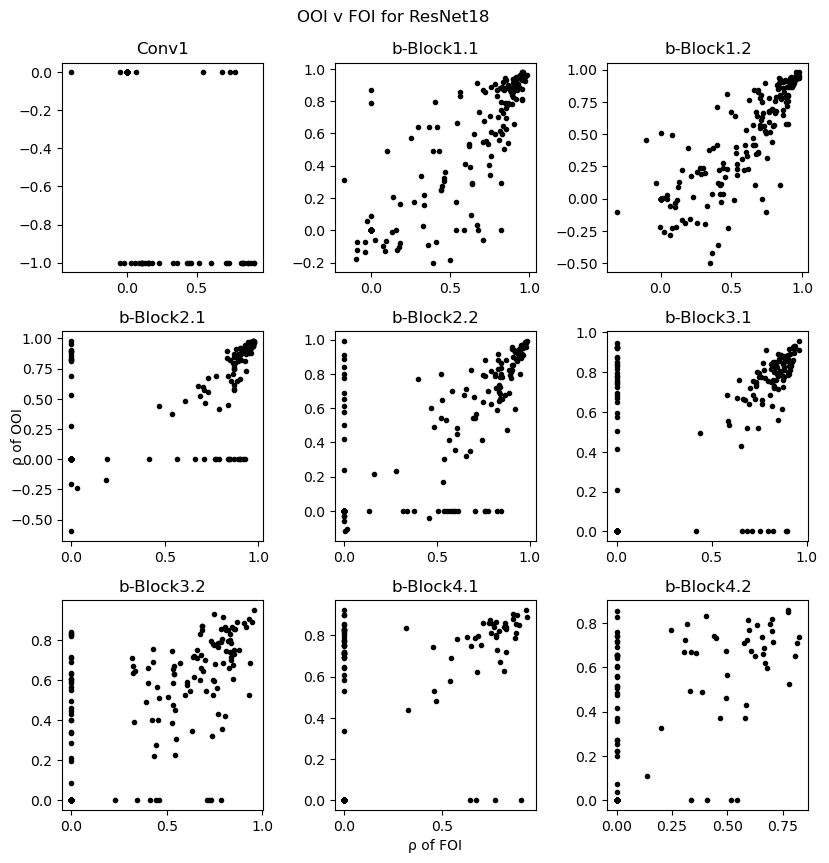

In [39]:
fig = plt.figure(figsize=(3*3, 3*3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(prs_resnet18_foi[hkey], prs_resnet18_ooi[hkey], "k.")
    ax.set_title(ResNet18_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for ResNet18")
plt.tight_layout(); plt.show()